<a href="https://colab.research.google.com/github/JoseAlbertoSeco/BlablacarCarpooling_DataMining/blob/Patterns/notebooks/ComparacionTransporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
import numpy as np

!wget https://github.com/JoseAlbertoSeco/BlablacarCarpooling_DataMining/raw/main/data/processed/df_trenes.csv
df_trenes = pd.read_csv('df_trenes.csv')

--2022-01-02 15:50:59--  https://github.com/JoseAlbertoSeco/BlablacarCarpooling_DataMining/raw/main/data/processed/df_trenes.csv
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JoseAlbertoSeco/BlablacarCarpooling_DataMining/main/data/processed/df_trenes.csv [following]
--2022-01-02 15:51:00--  https://raw.githubusercontent.com/JoseAlbertoSeco/BlablacarCarpooling_DataMining/main/data/processed/df_trenes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3444 (3.4K) [text/plain]
Saving to: ‘df_trenes.csv’

df_trenes.csv       100%[===================>]   3.36K  --.-KB/s    in 0s      

2022-01-02

# Grafos mesuales por pasajeros

Text(0, 0.5, 'Numero de pasajeros')

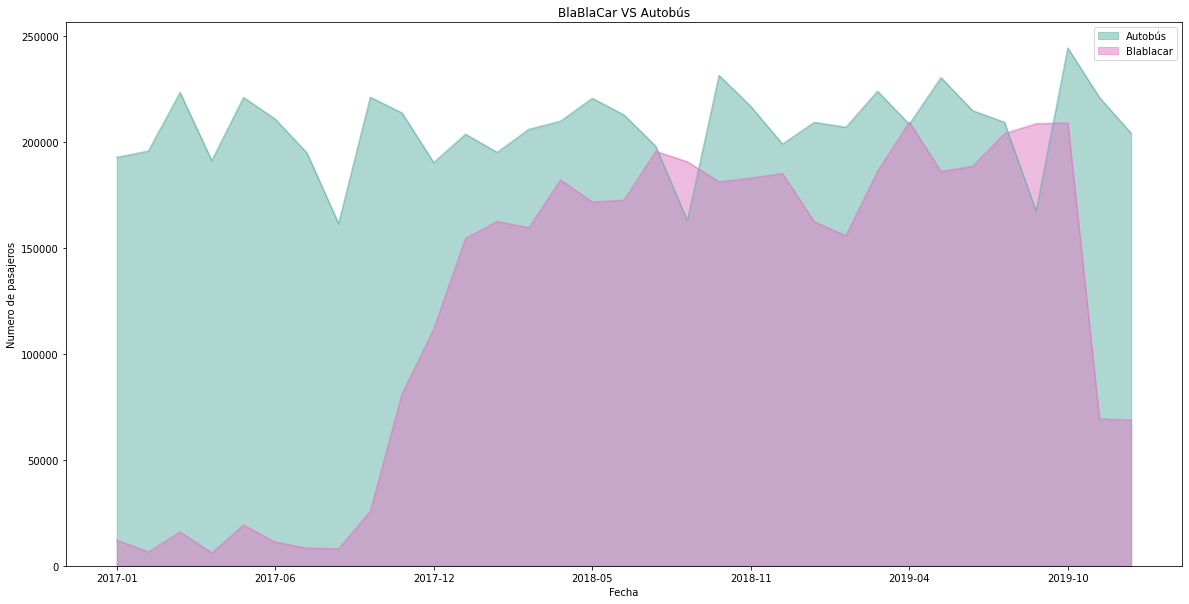

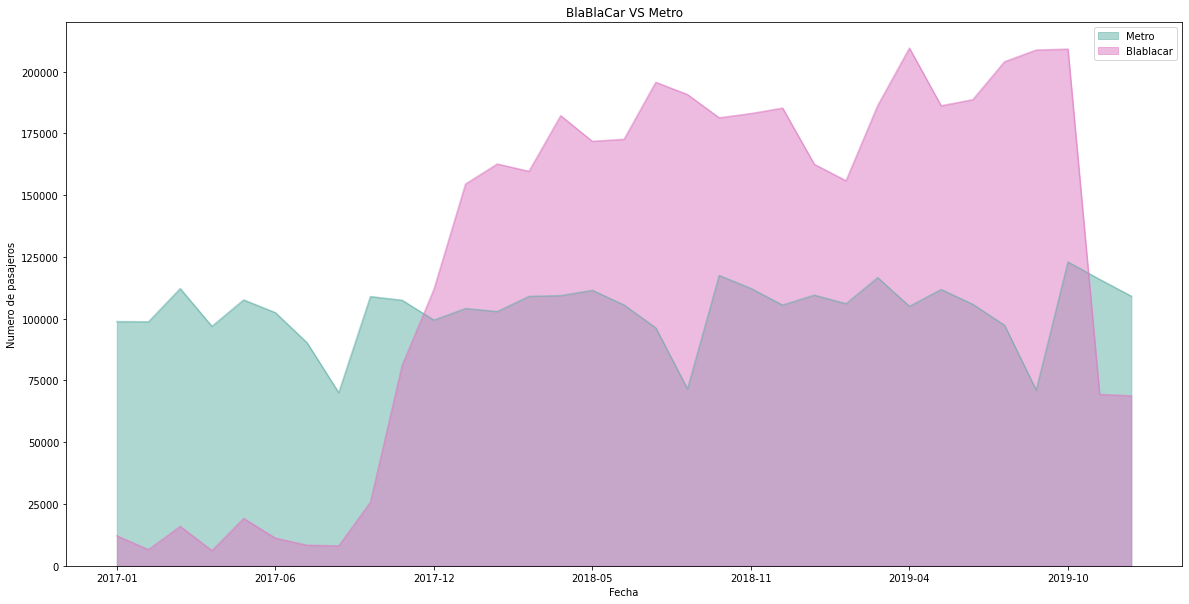

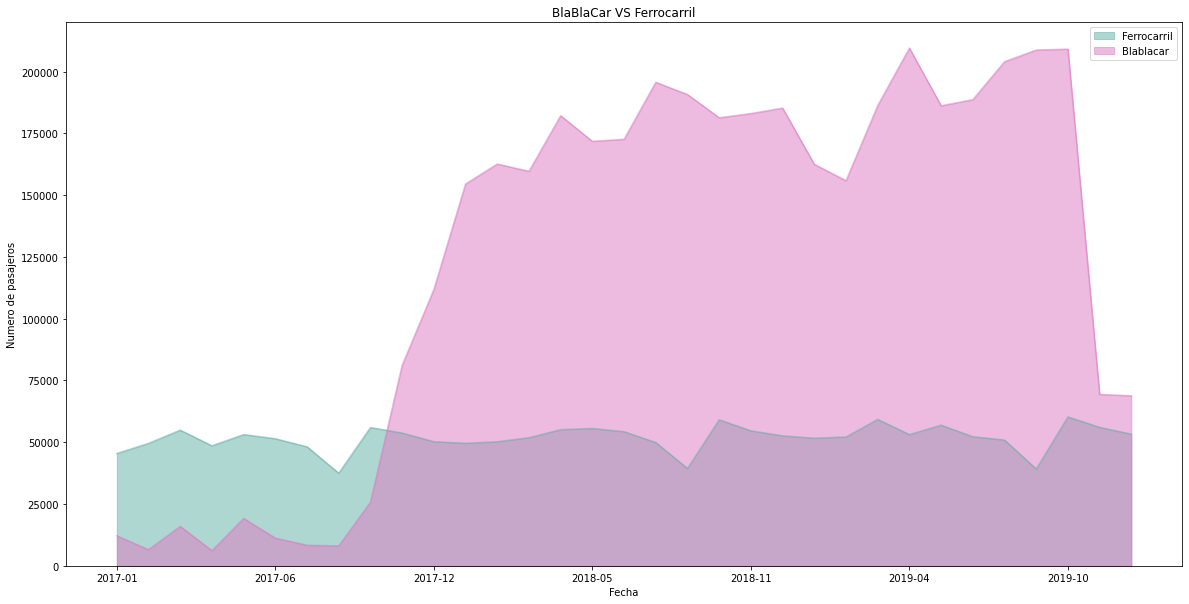

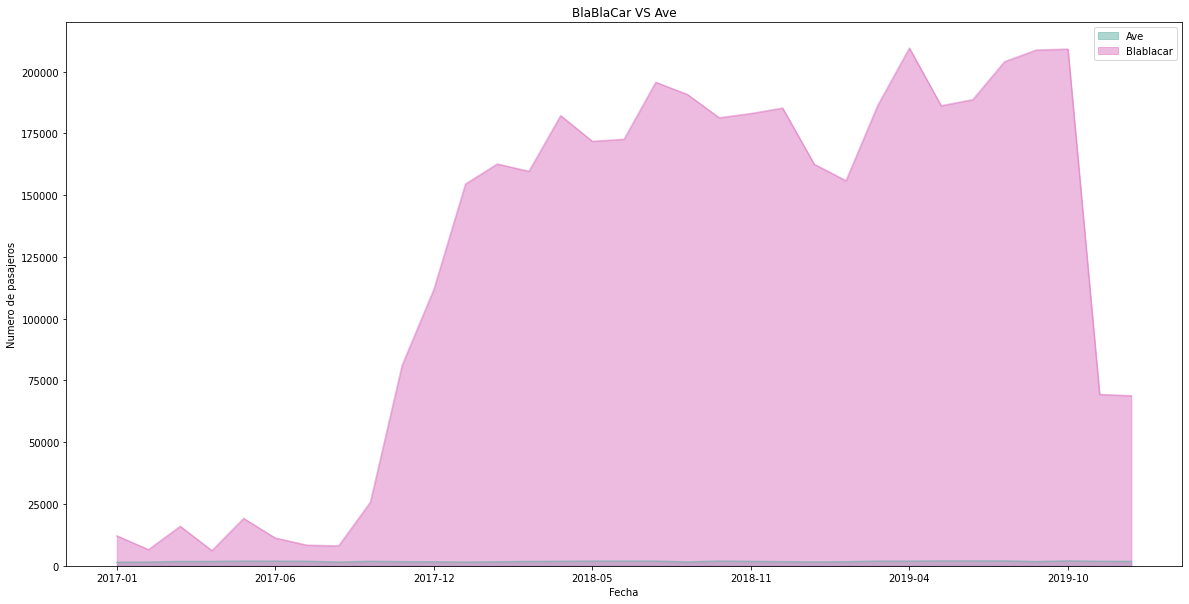

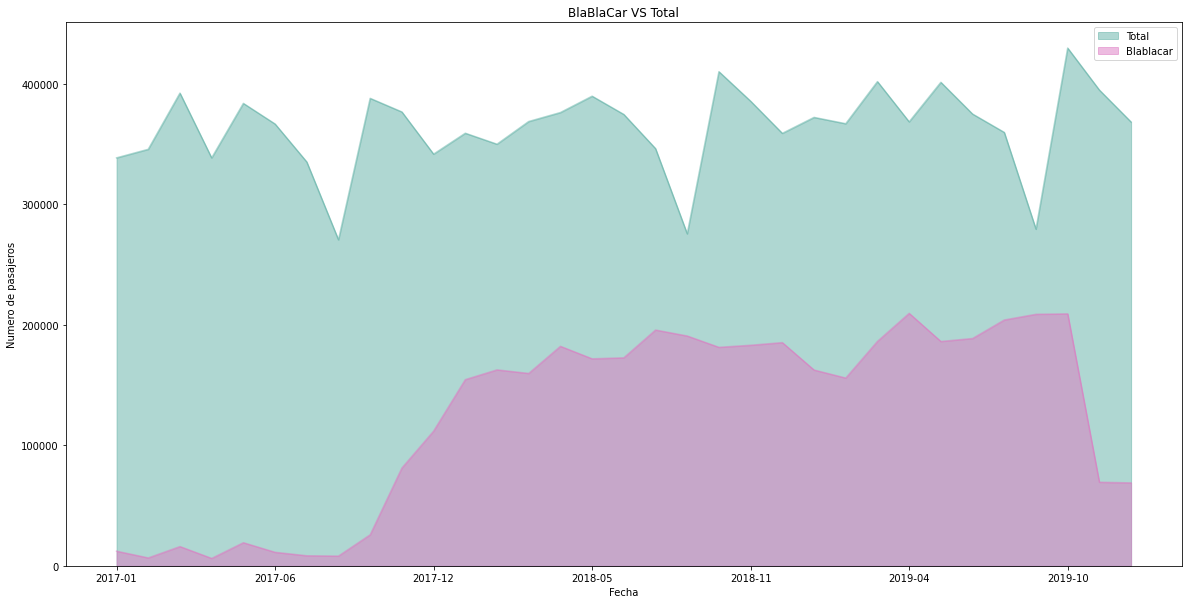

In [37]:
from tabulate import tabulate

viajesAutobus = []
viajesMetro = []
viajesFerrocarril = []
viajesAve = []
viajesTrans = []

for i in range(len(df_trenes['DIA'])):
  viajesAutobus.append(df_trenes['Interurbano por autobús regular'][i]+df_trenes['Transporte urbano regular por autobús'][i])
  viajesMetro.append(df_trenes['Urbano por metro'][i])
  viajesFerrocarril.append(df_trenes['Interurbano por ferrocarril'][i])
  viajesAve.append(df_trenes['AVE'][i])
  viajesTrans.append(viajesAutobus[i]+viajesMetro[i]+viajesFerrocarril[i]+viajesAve[i])

df_viajes = pd.DataFrame({
    'Fecha':df_trenes['DIA'],
    'Blablacar':df_trenes['ASIENTOS_CONFIRMADOS'],
    'Autobús':viajesAutobus,
    'Metro':viajesMetro,
    'Ferrocarril':viajesFerrocarril,
    'Ave':viajesAve,
    'Total':viajesTrans
})
df_viajes.set_index('Fecha',drop=True,inplace=True)

df_viajes[['Autobús','Blablacar']].plot(kind='area',stacked=False,figsize=(20,10), color=['#61b1a6', '#dd79c2'])
plt.title("BlaBlaCar VS Autobús")
plt.ylabel("Numero de pasajeros")

df_viajes[['Metro','Blablacar']].plot(kind='area',stacked=False,figsize=(20,10), color=['#61b1a6', '#dd79c2'])
plt.title("BlaBlaCar VS Metro")
plt.ylabel("Numero de pasajeros")

df_viajes[['Ferrocarril','Blablacar']].plot(kind='area',stacked=False,figsize=(20,10), color=['#61b1a6', '#dd79c2'])
plt.title("BlaBlaCar VS Ferrocarril")
plt.ylabel("Numero de pasajeros")

df_viajes[['Ave','Blablacar']].plot(kind='area',stacked=False,figsize=(20,10), color=['#61b1a6', '#dd79c2'])
plt.title("BlaBlaCar VS Ave")
plt.ylabel("Numero de pasajeros")

df_viajes[['Total','Blablacar']].plot(kind='area',stacked=False,figsize=(20,10), color=['#61b1a6', '#dd79c2'])
plt.title("BlaBlaCar VS Total")
plt.ylabel("Numero de pasajeros")


### Conclusión

* A finales de 2017 se aprecia una aumento en el uso de Blablacar notable.
* El número de viajeros en autobús es siempre mayor con respecto a los de Blablacar, excepto los meses de agosto de 2018 y 2019.
* El metro domina a Blablacar hasta finales de 2017. Luego, éste prácticamente le dobla en el número de pasajeros.
* Igual que en el caso anterior; pero mucho más notable.
* El Ave apenas se aprecia con respecto al Blablacar.
* Todo mes de agosto, como se puede ver en la gráfica donde se compara con el total, las personas usan menos el transporte público. Gracias a Blablacar, se puede suplir esa carencia, pues los usuarios siguen usando este transporte.



# Relación porcentual 
En esta sección se va a ver la relación que hay entre los distintos transportes con el Blablacar.

In [36]:
from pandas.io.parsers import read_csv
from tabulate import tabulate

df_trenes = read_csv('df_trenes.csv')

diffBus = []
diffMet = []
diffBus = []
diffFer = []
diffAve = []

for i in range(len(df_trenes['DIA'])):
  diffBus.append(df_trenes['ASIENTOS_CONFIRMADOS'][i]/(df_trenes['Transporte urbano regular por autobús'][i]+df_trenes['Interurbano por autobús regular'][i]))
  diffMet.append(df_trenes['ASIENTOS_CONFIRMADOS'][i]/df_trenes['Urbano por metro'][i])
  diffFer.append(df_trenes['ASIENTOS_CONFIRMADOS'][i]/df_trenes['Interurbano por ferrocarril'][i])
  diffAve.append(df_trenes['ASIENTOS_CONFIRMADOS'][i]/df_trenes['AVE'][i])

df_diff = pd.DataFrame({
    'Fecha':df_trenes['DIA'],
    'Autobus':diffBus,
    'Metro':diffMet,
    'Ferrocarrol':diffFer,
    'AVE':diffAve
})
df_diff.set_index('Fecha',drop=True,inplace=True)

#print(tabulate(df_diff, headers="keys"))

df_diff.describe()

,Autobus,Metro,Ferrocarrol,AVE
count,33.000000,33.000000,33.000000,33.000000
mean,0.601008,1.210785,2.398038,68.950785
std,0.386182,0.812804,1.561002,42.858322
min,0.032040,0.063230,0.126179,3.444632
25%,0.116486,0.236439,0.460376,14.032680
50%,0.776086,1.483904,3.090173,92.354167
75%,0.855498,1.665929,3.350276,101.094153
max,1.246860,2.936332,5.329435,122.355217


### Conclusión
* Los pasajeros del autobús son un poco más del 20% con respecto a los del Blablacar.
* A su vez, los del Blablacar son casi un 50% más que los del metro.
* Sin embargo, los del ferrocarril son 1/3 con respecto a los del Blablacar.
* La diferencia entre el AVE y Blablacar se aprecia en la gráfica anterior.

### Autobús VS Blablacar

Como hay tantos viajes de autobús, vamos a hacer una comparativa con los de Blabacar para ver si hay meses en los que tienen un número de pasajeros similar. Para ello vamos a ver los meses que el Blablacar tienen menos de un 10% de diferencia.

A continuación se refleja el resultado:

In [35]:
df_menorBus = []
df_fechaBus = []
for i in range(len(df_diff['Autobus'])):
  if df_diff['Autobus'][i] > 0.9:
    df_menorBus.append(df_diff['Autobus'][i])
    df_fechaBus.append(df_trenes['DIA'][i])

df_blablacarBus = {
    'Fecha': df_fechaBus,
    'Autobus': df_menorBus
}

print(tabulate(df_blablacarBus, headers="keys"))

Fecha      Autobus
-------  ---------
2018-07   0.98768
2018-08   1.17027
2018-12   0.930368
2019-04   1.00526
2019-07   0.974157
2019-08   1.24686


Se aprecia que los meses de julio y agosto Blablacar tiene casi o más usuarios que el autobús. Si queremos que aumente el uso de Blablacar en los otros 10 meses habría que potenciarlo.

## Representación Gráfica

Text(0.5, 0, 'Fechas')

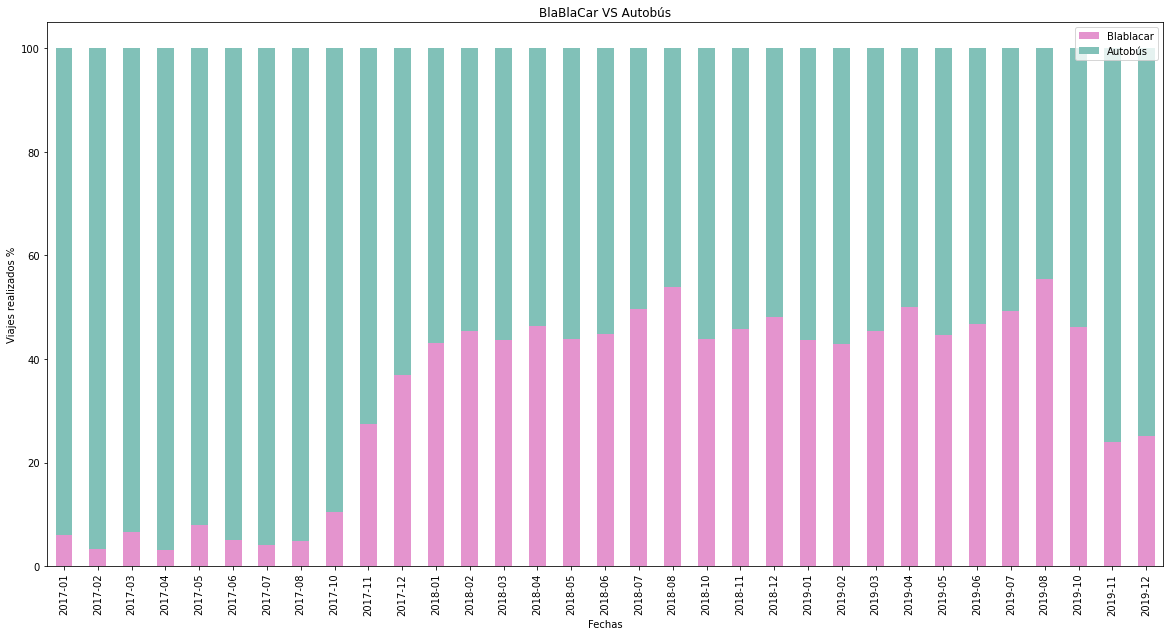

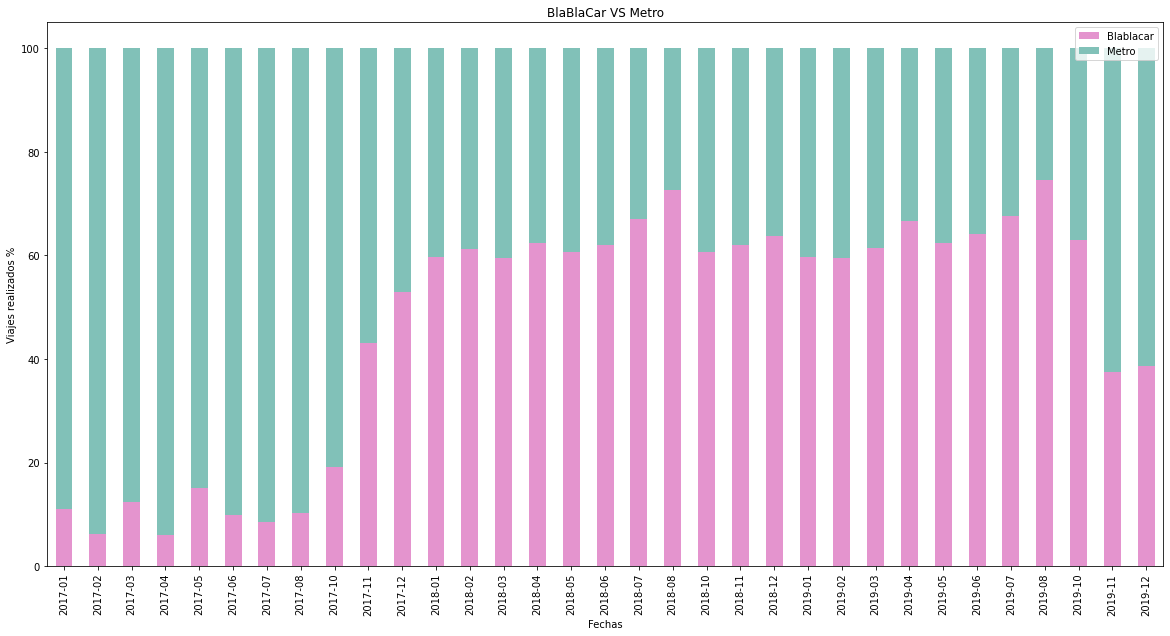

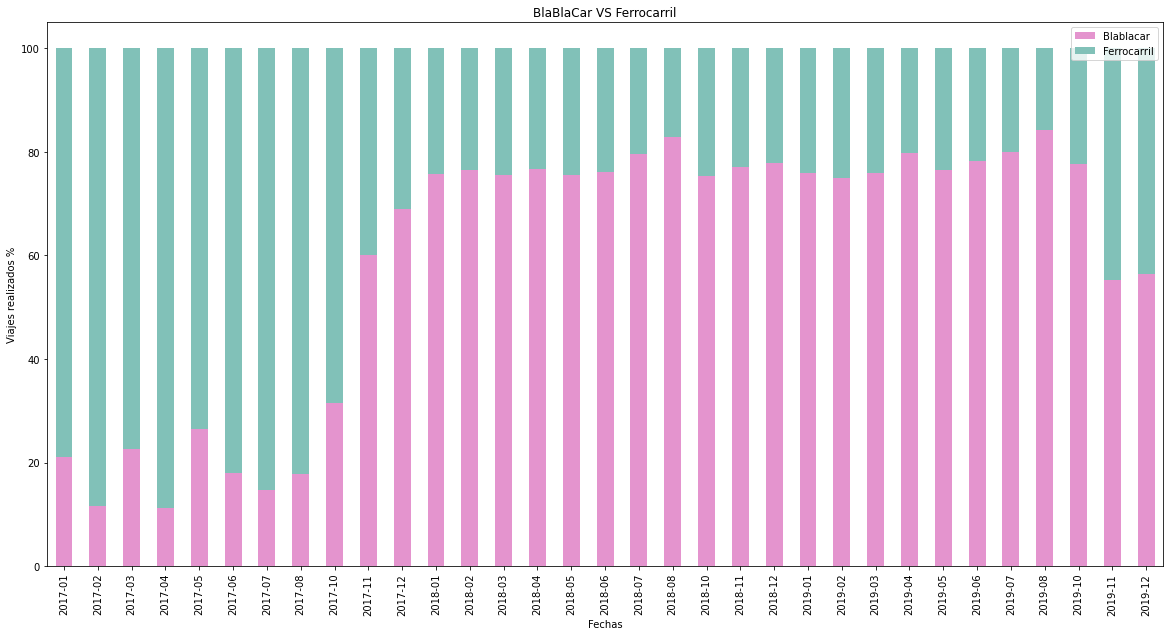

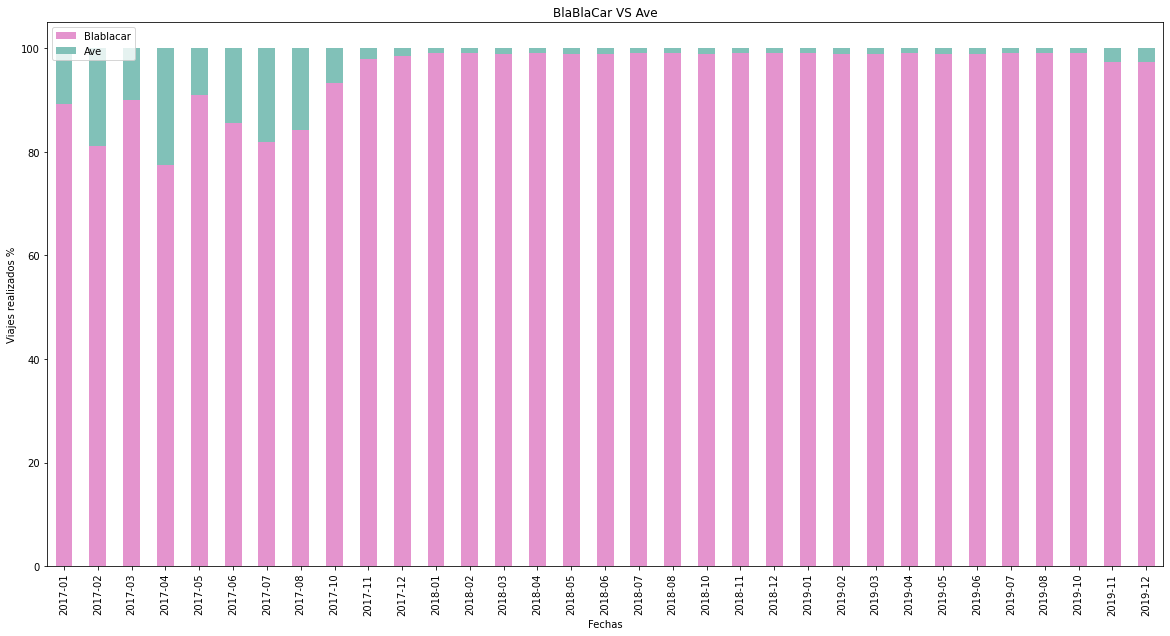

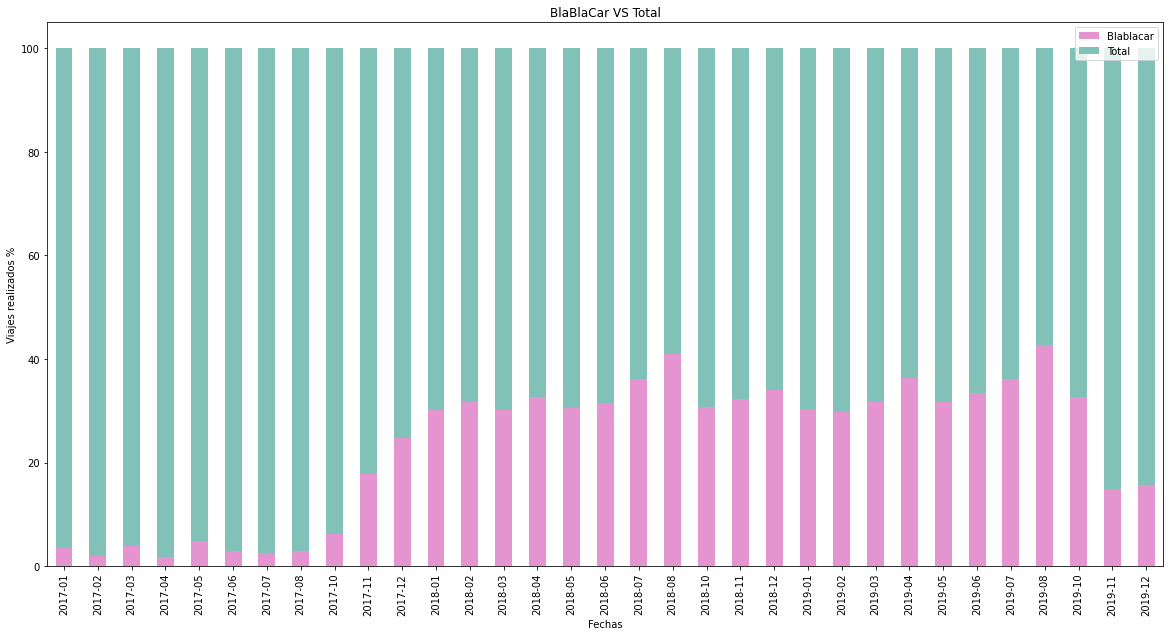

In [19]:
import matplotlib.pyplot as plt

stacked_data = df_viajes[['Blablacar','Autobús']].apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(20,10),color=['#e494ce','#81c1b8'])
plt.title("BlaBlaCar VS Autobús")
plt.ylabel("Viajes realizados %")
plt.xlabel("Fechas")

stacked_data = df_viajes[['Blablacar','Metro']].apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(20,10),color=['#e494ce','#81c1b8'])
plt.title("BlaBlaCar VS Metro")
plt.ylabel("Viajes realizados %")
plt.xlabel("Fechas")

stacked_data = df_viajes[['Blablacar','Ferrocarril']].apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(20,10),color=['#e494ce','#81c1b8'])
plt.title("BlaBlaCar VS Ferrocarril")
plt.ylabel("Viajes realizados %")
plt.xlabel("Fechas")

stacked_data = df_viajes[['Blablacar','Ave']].apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(20,10),color=['#e494ce','#81c1b8'])
plt.title("BlaBlaCar VS Ave")
plt.ylabel("Viajes realizados %")
plt.xlabel("Fechas")

stacked_data = df_viajes[['Blablacar','Total']].apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(20,10),color=['#e494ce','#81c1b8'])
plt.title("BlaBlaCar VS Total")
plt.ylabel("Viajes realizados %")
plt.xlabel("Fechas")